In [1]:
# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/wjsBtZzUVjKaB3J', 'data/steinmetz_all.csv')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/steinmetz_all.csv")
df.head()

,Unnamed: 0,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id
0,0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e
1,1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e
2,2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e
3,3,4,True,0,0,0.5,0.761612,0.0,2.266802,2.296436,1.0,860.0,1.0,Cori,2016-12-14,5dd41e
4,4,5,True,50,100,0.5,0.662010,1.0,0.816776,0.827613,-1.0,140.0,1.0,Cori,2016-12-14,5dd41e


In [4]:
import seaborn as sns

<Axes: xlabel='contrast_left', ylabel='response_type'>

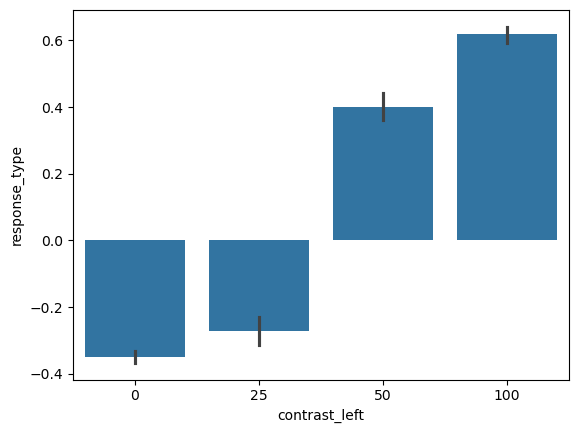

In [5]:
sns.barplot(data=df, x="contrast_left", y="response_type")

In [6]:
df["contrast_diff"] = df["contrast_left"] - df["contrast_right"]

In [7]:
df.head()

,Unnamed: 0,trial,active_trials,contrast_left,contrast_right,stim_onset,gocue_time,response_type,response_time,feedback_time,feedback_type,reaction_time,reaction_type,mouse,session_date,session_id,contrast_diff
0,0,1,True,100,0,0.5,1.027216,1.0,1.150204,1.186819,1.0,170.0,1.0,Cori,2016-12-14,5dd41e,100
1,1,2,True,0,50,0.5,0.874414,-1.0,1.399503,1.437623,1.0,230.0,-1.0,Cori,2016-12-14,5dd41e,-50
2,2,3,True,100,50,0.5,0.825213,1.0,0.949291,0.986016,1.0,200.0,1.0,Cori,2016-12-14,5dd41e,50
3,3,4,True,0,0,0.5,0.761612,0.0,2.266802,2.296436,1.0,860.0,1.0,Cori,2016-12-14,5dd41e,0
4,4,5,True,50,100,0.5,0.662010,1.0,0.816776,0.827613,-1.0,140.0,1.0,Cori,2016-12-14,5dd41e,-50


In [8]:
cols = ["contrast_left", "contrast_right", "contrast_diff"]
df[cols]

,contrast_left,contrast_right,contrast_diff
0,100,0,100
1,0,50,-50
2,100,50,50
3,0,0,0
4,50,100,-50
...,...,...,...
14415,100,100,0
14416,0,100,-100
14417,0,50,-50
14418,0,100,-100


In [9]:
df["contrast_diff_abs"] = df["contrast_diff"].abs()

In [10]:
cols = ["contrast_left", "contrast_right", "contrast_diff", "contrast_diff_abs"]
df[cols]

,contrast_left,contrast_right,contrast_diff,contrast_diff_abs
0,100,0,100,100
1,0,50,-50,50
2,100,50,50,50
3,0,0,0,0
4,50,100,-50,50
...,...,...,...,...
14415,100,100,0,0
14416,0,100,-100,100
14417,0,50,-50,50
14418,0,100,-100,100


<Axes: xlabel='contrast_diff_abs', ylabel='response_time'>

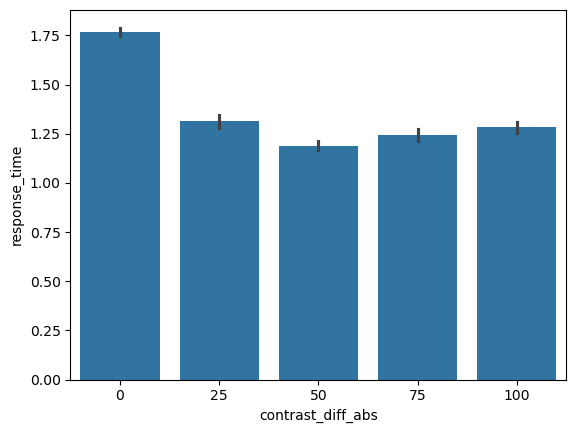

In [11]:
sns.barplot(data=df, x="contrast_diff_abs", y="response_time")

<Axes: xlabel='contrast_diff_abs', ylabel='response_time'>

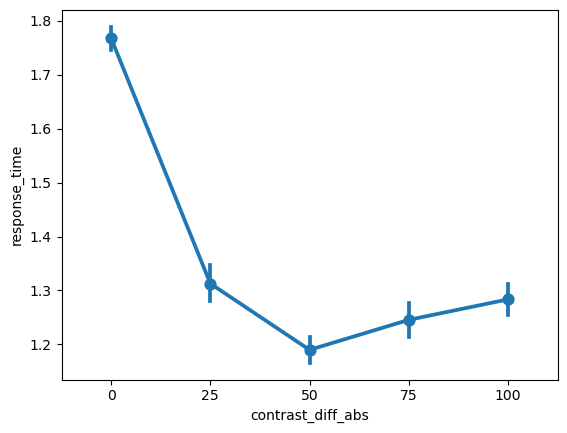

In [12]:
sns.pointplot(data=df, x="contrast_diff_abs", y="response_time")

In [13]:
sns.pointplot?

Signature:
sns.pointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    color=None,
    palette=None,
    hue_norm=None,
    markers=<default>,
    linestyles=<default>,
    dodge=False,
    log_scale=None,
    native_scale=False,
    orient=None,
    capsize=0,
    formatter=None,
    legend='auto',
    err_kws=None,
    ci=<deprecated>,
    errwidth=<deprecated>,
    join=<deprecated>,
    scale=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors using lines with markers.

A point plot represents an estimate of central tendency for a numeric
variable by the position of the dot and provides some indication of the
uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons
between different levels of one or more categorical variables. They are


---

### Creating high-quality plots with Seaborn

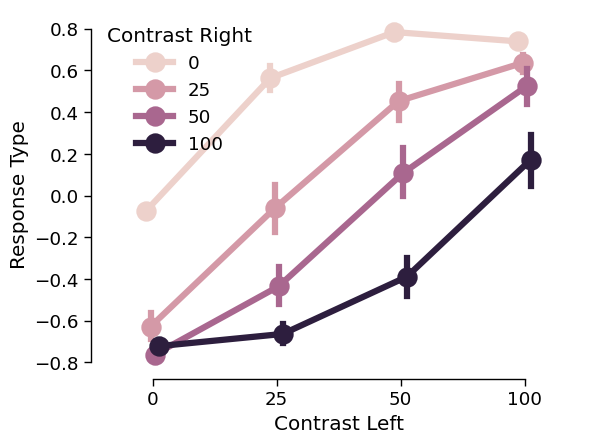

In [14]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns_plot = sns.pointplot(data=df, x="contrast_left", y="response_type", hue="contrast_right", dodge=True)
sns_plot.set(xlabel="Contrast Left")
sns_plot.set(ylabel="Response Type")
sns_plot.legend_.set_title("Contrast Right")
sns_plot.legend_.set_frame_on(False)

sns.despine(trim=True)

# sns_plot.figure.savefig("demo1.png", dpi=300, bbox_inches="tight")

#### Exploring [Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

C:\Users\moham\AppData\Local\Temp\ipykernel_20224\288759332.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns_plot = sns.pointplot(data=df, x="contrast_left", y="response_type", hue="contrast_right", dodge=True, palette=color_palette)


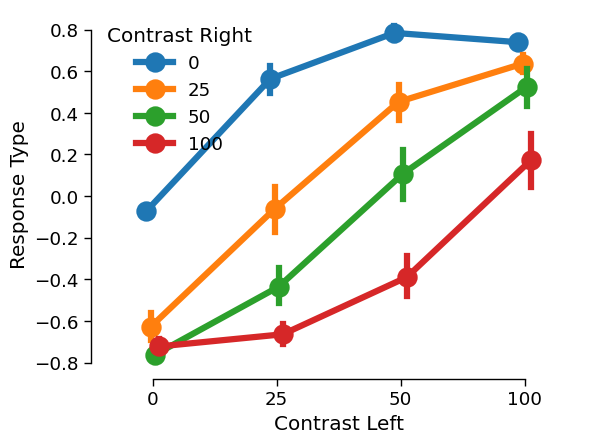

In [15]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Let's specify the color palette want to use for this plot
color_palette = sns.color_palette()

sns_plot = sns.pointplot(data=df, x="contrast_left", y="response_type", hue="contrast_right", dodge=True, palette=color_palette)
sns_plot.set(xlabel="Contrast Left")
sns_plot.set(ylabel="Response Type")
sns_plot.legend_.set_title("Contrast Right")
sns_plot.legend_.set_frame_on(False)

sns.despine(trim=True)

# sns_plot.figure.savefig("demo1.png", dpi=300, bbox_inches="tight")

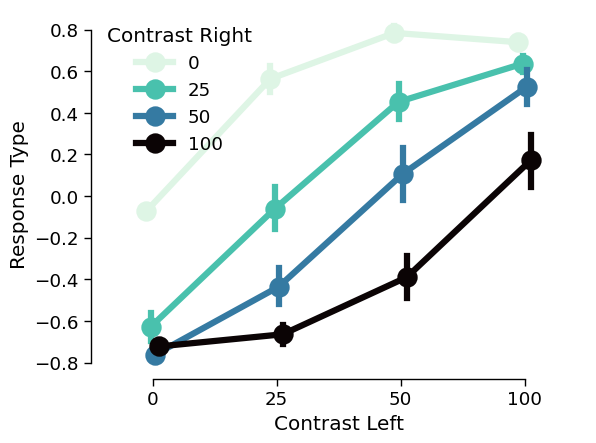

In [16]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Let's specify the color palette want to use for this plot
color_palette = sns.color_palette("mako_r", as_cmap=True)

sns_plot = sns.pointplot(data=df, x="contrast_left", y="response_type", hue="contrast_right", dodge=True, palette=color_palette)
sns_plot.set(xlabel="Contrast Left")
sns_plot.set(ylabel="Response Type")
sns_plot.legend_.set_title("Contrast Right")
sns_plot.legend_.set_frame_on(False)

sns.despine(trim=True)

sns_plot.figure.savefig("demo1.png", dpi=200, bbox_inches="tight")